by **Ariel Rodrigo Colque Garcia**


[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Instance Segmentation, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy the Trained Model to Roboflow

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed Dec 13 07:09:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content'

/content


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **12.02.2023** with version **YOLOv8.0.28**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.4/659.4 kB 6.4 MB/s eta 0:00:00


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
!pip install albumentations

In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from IPython import display
display.clear_output()

from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oBkRYmxIVRFQKVIvhZVa")
project = rf.workspace("segmentacion-iwaek").project("medicinal_plants")
dataset = project.version(15).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Suc

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.223, to fix: `pip install ultralytics==8.0.196`


KeyboardInterrupt: ignored

# ALBUMENTATION

In [ ]:
import cv2
import albumentations as A
import os
import shutil

In [ ]:
num_archivos = len(os.listdir('/content/datasets/medicinal_plants-15/train/labels'))

print('Número de Labels en la carpeta:', num_archivos)

Número de Labels en la carpeta: 21304


In [ ]:
num_archivos = len(os.listdir('/content/datasets/medicinal_plants-15/train/labels'))

print('Número de Labels en la carpeta:', num_archivos)

Número de Labels en la carpeta: 63912


In [ ]:
!pwd

/content


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload() # sube el archivo kaggle.json desde la máquina local
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d rodrigocolque/medicinal-plants-15

100% 12.7G/12.7G [12:38<00:00, 20.6MB/s]
100% 12.7G/12.7G [12:39<00:00, 18.0MB/s]


In [ ]:
import zipfile
# Abre el archivo zip en modo lectura
with zipfile.ZipFile("/content/medicinal-plants-15.zip", "r") as zip_ref:
  # Extrae el contenido del archivo zip en la carpeta '/content'
  zip_ref.extractall("/content/medicinal-plants-15")

In [ ]:
import os
# reemplaza 'ruta_de_tu_carpeta' con la ruta de tu carpeta
num_archivos = len(os.listdir('/content/medicinal-plants-15/train/images'))
print('Número de archivos en la carpeta:', num_archivos)

Número de archivos en la carpeta: 85216


In [ ]:
!rm -rf /content/drive/MyDrive/USFX/TrainPlantsLONG/train11

In [ ]:
!yolo task=segment mode=train model=yolov8l-seg.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640 project=/content/drive/MyDrive/USFX/TrainPlantsLONG

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, for

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train2/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train2/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train3/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train3/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train4/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train4/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train5/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train5/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train6/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train6/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train7/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train7/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train8/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train8/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train10/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train10/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, f

In [ ]:
!yolo task=segment resume mode=train model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train11/weights/last.pt data=/content/medicinal-plants-15/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train11/weights/last.pt, data=/content/medicinal-plants-15/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/USFX/TrainPlantsLONG, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, f

In [ ]:
!yolo task=segment resume mode=val model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train11/weights/best.pt data=/content/medicinal-plants-15/data.yaml

2023-12-13 09:23:05.733160: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 09:23:05.733206: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 09:23:05.736352: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 09:23:08.560579: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45917285 parameters, 0 gradients, 220.2 GFLOPs
val: Scanning /content/medicinal-plants-15/valid/labels.cache..

In [ ]:
%cd /content/drive/MyDrive/TEST

/content/drive/MyDrive/TEST


In [ ]:
model = YOLO('/content/drive/MyDrive/USFX/TrainPlantsLONG/train11/weights/best.pt')
image_path = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231207_144841.mp4'
results1 = model.predict(source=image_path, conf=0.5, save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45917285 parameters, 0 gradients, 220.2 GFLOPs

video 1/1 (1/2278) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231207_144841.mp4: 640x384 48.8ms
video 1/1 (2/2278) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231207_144841.mp4: 640x384 43.3ms
video 1/1 (3/2278) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231207_144841.mp4: 640x384 43.3ms
video 1/1 (4/2278) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231207_144841.mp4: 640x384 34.2ms
video 1/1 (5/2278) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231207_144841.mp4: 640x384 1 menta_silvestre, 32.9ms
video 1/1 (6/2278) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231207_144841.mp4: 640x384 32

In [ ]:
model = YOLO('/content/drive/MyDrive/USFX/TrainPlantsLONG/train11/weights/best.pt')
image_path = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231125_103435.mp4'
results1 = model.predict(source=image_path, conf=0.5, save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45917285 parameters, 0 gradients, 220.2 GFLOPs

video 1/1 (1/1925) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231125_103435.mp4: 640x384 49.1ms
video 1/1 (2/1925) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231125_103435.mp4: 640x384 41.6ms
video 1/1 (3/1925) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231125_103435.mp4: 640x384 36.1ms
video 1/1 (4/1925) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231125_103435.mp4: 640x384 36.2ms
video 1/1 (5/1925) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231125_103435.mp4: 640x384 1 menta_silvestre, 32.4ms
video 1/1 (6/1925) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231125_103435.mp4: 640x384 31

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src=""
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 4: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [ ]:
%cd {HOME}

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oBkRYmxIVRFQKVIvhZVa")
project = rf.workspace("segmentacion-iwaek").project("medicinal_plants")
dataset = project.version(15).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 792.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      S

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to medicinal_plants-15 in yolov8:: 100%|██████████| 47678/47678 [00:14<00:00, 3400.51it/s]


# ALBUMENTATION

In [ ]:
import cv2
import albumentations as A
import os
import shutil

In [ ]:
import os
image_root = '/content/datasets/medicinal_plants-15/train/images'
labels_root = '/content/datasets/medicinal_plants-15/train/labels'

a_images = '/content/datasets/medicinal_plants-15/train/images'
a_labels = '/content/datasets/medicinal_plants-15/train/labels'

In [ ]:
num_archivos = len(os.listdir('/content/datasets/medicinal_plants-15/train/images'))

print('Número de Labels en la carpeta:', num_archivos)

Número de Labels en la carpeta: 21304


In [ ]:
# Obtener la lista de nombres de archivos en la carpeta de imágenes
image_files = os.listdir(image_root)
# Filtrar solo los archivos de imágenes
image_files = [file for file in image_files if file.lower().endswith(('.jpg', '.jpeg'))]

In [ ]:
image_files[:10] ,len(image_files)

(['IMG_20230925_134002_674_jpg.rf.980cf424768690c36f70ef85a6f063e1.jpg',
  'IMG_20231202_124145_228_jpg.rf.98a35103078ec81db7c8cd08af0fef10.jpg',
  'IMG_20230907_111641_959_jpg.rf.464f00c0d0fcf181aa45fc995fce6b88.jpg',
  'eucalipto98_jpg.rf.2d88ee9b8193dda427b8dd52dfe977c1.jpg',
  'IMG_20230907_110628_044_jpg.rf.55e932ecb9cc7b42e7d49256ff09c49f.jpg',
  'IMG_20230920_083322_487_jpg.rf.85243b6766f30ad6c32d7b11054b5352.jpg',
  'IMG_20231128_152803_696_jpg.rf.dd86077cede4af53e85fb1c27e1be546.jpg',
  'IMG_20231128_152830_428_jpg.rf.1a4e5db0479bbe0052ab6cd858d82f0a.jpg',
  'IMG_20231202_134217_858_jpg.rf.4abd3ea64314b59dd292de4229db05f5.jpg',
  'eucalipto279_jpg.rf.649a0a192c21b39b74a9453b53d10bd6.jpg'],
 21304)

In [ ]:
# Loop over each file in the image directory
for i, file in enumerate(image_files):
    # Read the original image
    image = cv2.imread(f"{image_root}/{file}")

    # Define the transformation for both image and labels
    transform = A.Compose([
        A.RandomBrightnessContrast(p=1),
        A.RandomGamma(p=1),
        A.CLAHE(p=1),
        A.CoarseDropout(max_holes=8, max_height=16, max_width=16, min_height=8, min_width=16, p=1)
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-shaper.jpg', t_image)

    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-shaper.txt')

    # Define the transformation for both image and labels
    transform = A.Compose([
        A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2, hue=0.2,p=0.5),
        A.MotionBlur(blur_limit=33, p=0.1),
        A.GaussNoise(var_limit=(0, 255), p=0.1)
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-Channel.jpg', t_image)
    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-Channel.txt')

        # Define the transformation for both image and labels
    transform = A.Compose([
        A.CLAHE(p=1, clip_limit=5),
        A.Sharpen(always_apply=False, p=1.0, alpha=(0.2, 0.5), lightness=(0.5, 1.0)),
        A.PixelDropout(always_apply=False, p=1.0, dropout_prob=0.05, per_channel=1, drop_value=(0, 0, 0), mask_drop_value=None)
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-Multi.jpg', t_image)

    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-Multi.txt')

In [ ]:
num_archivos = len(os.listdir('/content/datasets/medicinal_plants-15/train/labels'))

print('Número de Labels en la carpeta:', num_archivos)

Número de Labels en la carpeta: 85216


In [ ]:
import os
image_root = '/content/datasets/medicinal_plants-15/valid/images'
labels_root = '/content/datasets/medicinal_plants-15/valid/labels'

a_images = '/content/datasets/medicinal_plants-15/valid/images'
a_labels = '/content/datasets/medicinal_plants-15/valid/labels'

In [ ]:
# Obtener la lista de nombres de archivos en la carpeta de imágenes
image_files = os.listdir(image_root)
# Filtrar solo los archivos de imágenes
image_files = [file for file in image_files if file.lower().endswith(('.jpg', '.jpeg'))]

In [ ]:
num_archivos = len(os.listdir('/content/datasets/medicinal_plants-15/valid/labels'))

print('Número de Labels en la carpeta:', num_archivos)

Número de Labels en la carpeta: 1724


In [ ]:
# Loop over each file in the image directory
for i, file in enumerate(image_files):
    # Read the original image
    image = cv2.imread(f"{image_root}/{file}")

    # Define the transformation for both image and labels
    transform = A.Compose([
        A.RandomBrightnessContrast(p=1),
        A.RandomGamma(p=1),
        A.CLAHE(p=1),
        A.CoarseDropout(max_holes=8, max_height=16, max_width=16, min_height=8, min_width=16, p=1)
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-shaper.jpg', t_image)

    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-shaper.txt')

    # Define the transformation for both image and labels
    transform = A.Compose([
        A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2, hue=0.2,p=0.5),
        A.MotionBlur(blur_limit=33, p=0.1),
        A.GaussNoise(var_limit=(0, 255), p=0.1)
    ])

    # Apply the transformation to the image and labels
    augmented = transform(image=image)
    t_image = augmented['image']

    # Save the transformed image
    cv2.imwrite(f'{a_images}/{file[:-4]}-Channel.jpg', t_image)
    # Copy the corresponding text file to the new directory
    shutil.copy(f'{labels_root}/{file[:-4]}.txt', f'{a_labels}/{file[:-4]}-Channel.txt')

In [ ]:
num_archivos = len(os.listdir('/content/datasets/medicinal_plants-15/valid/images'))

print('Número de Labels en la carpeta:', num_archivos)

Número de Labels en la carpeta: 6896


## Custom Training

In [ ]:
!pwd

/content/datasets


*Hiperparametros*

    El parámetro lr0 es la tasa de aprendizaje inicial y lrf es la tasa de aprendizaje final en la última época de entrenamiento.
    lr0 = lrf = 0.01

    En cuanto al parámetro cos_lr, si se establece en True, el programa de velocidad de aprendizaje seguirá un patrón de recocido coseno en lugar de un programa lineal.
    Esto puede conducir a un programa de aprendizaje más suave y potencialmente mejores resultados. Tanto lr0 como lrf se siguen utilizando en el programa de aprendizaje de recocido coseno.

In [ ]:
!pwd

/content


In [ ]:

!yolo task=segment mode=train model=yolov8m-seg.pt data=/content/drive/MyDrive/USFX/medicinal_plants-15/data.yaml epochs=10 imgsz=640 batch=64 project=/content/drive/MyDrive/TRAINS/trainV17

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/USFX/medicinal_plants-15/data.yaml, epochs=10, patience=50, batch=64, imgsz=640, save=True, cache=False, device=None, workers=8, project=/content/drive/MyDrive/TRAINS/trainV17, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

In [ ]:
!yolo task=segment mode=train resume model=yolov8m-seg.pt data='/content/drive/MyDrive/USFX/medicinal_plants-15/data.yaml' epochs=20 imgsz=640 batch=64

In [ ]:
import os

num_archivos = len(os.listdir('/content/drive/MyDrive/USFX/medicinal_plants-15/train/labels'))
print('Número de archivos en la carpeta:', num_archivos)

Número de archivos en la carpeta: 18463


In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskPR_curve.png	 train_batch8732.jpg
BoxF1_curve.png					    MaskR_curve.png	 val_batch0_labels.jpg
BoxP_curve.png					    results.csv		 val_batch0_pred.jpg
BoxPR_curve.png					    results.png		 val_batch1_labels.jpg
BoxR_curve.png					    train_batch0.jpg	 val_batch1_pred.jpg
confusion_matrix.png				    train_batch1.jpg	 val_batch2_labels.jpg
events.out.tfevents.1699578109.11d72f922ae0.3385.0  train_batch2.jpg	 val_batch2_pred.jpg
MaskF1_curve.png				    train_batch8730.jpg  weights
MaskP_curve.png					    train_batch8731.jpg


/content


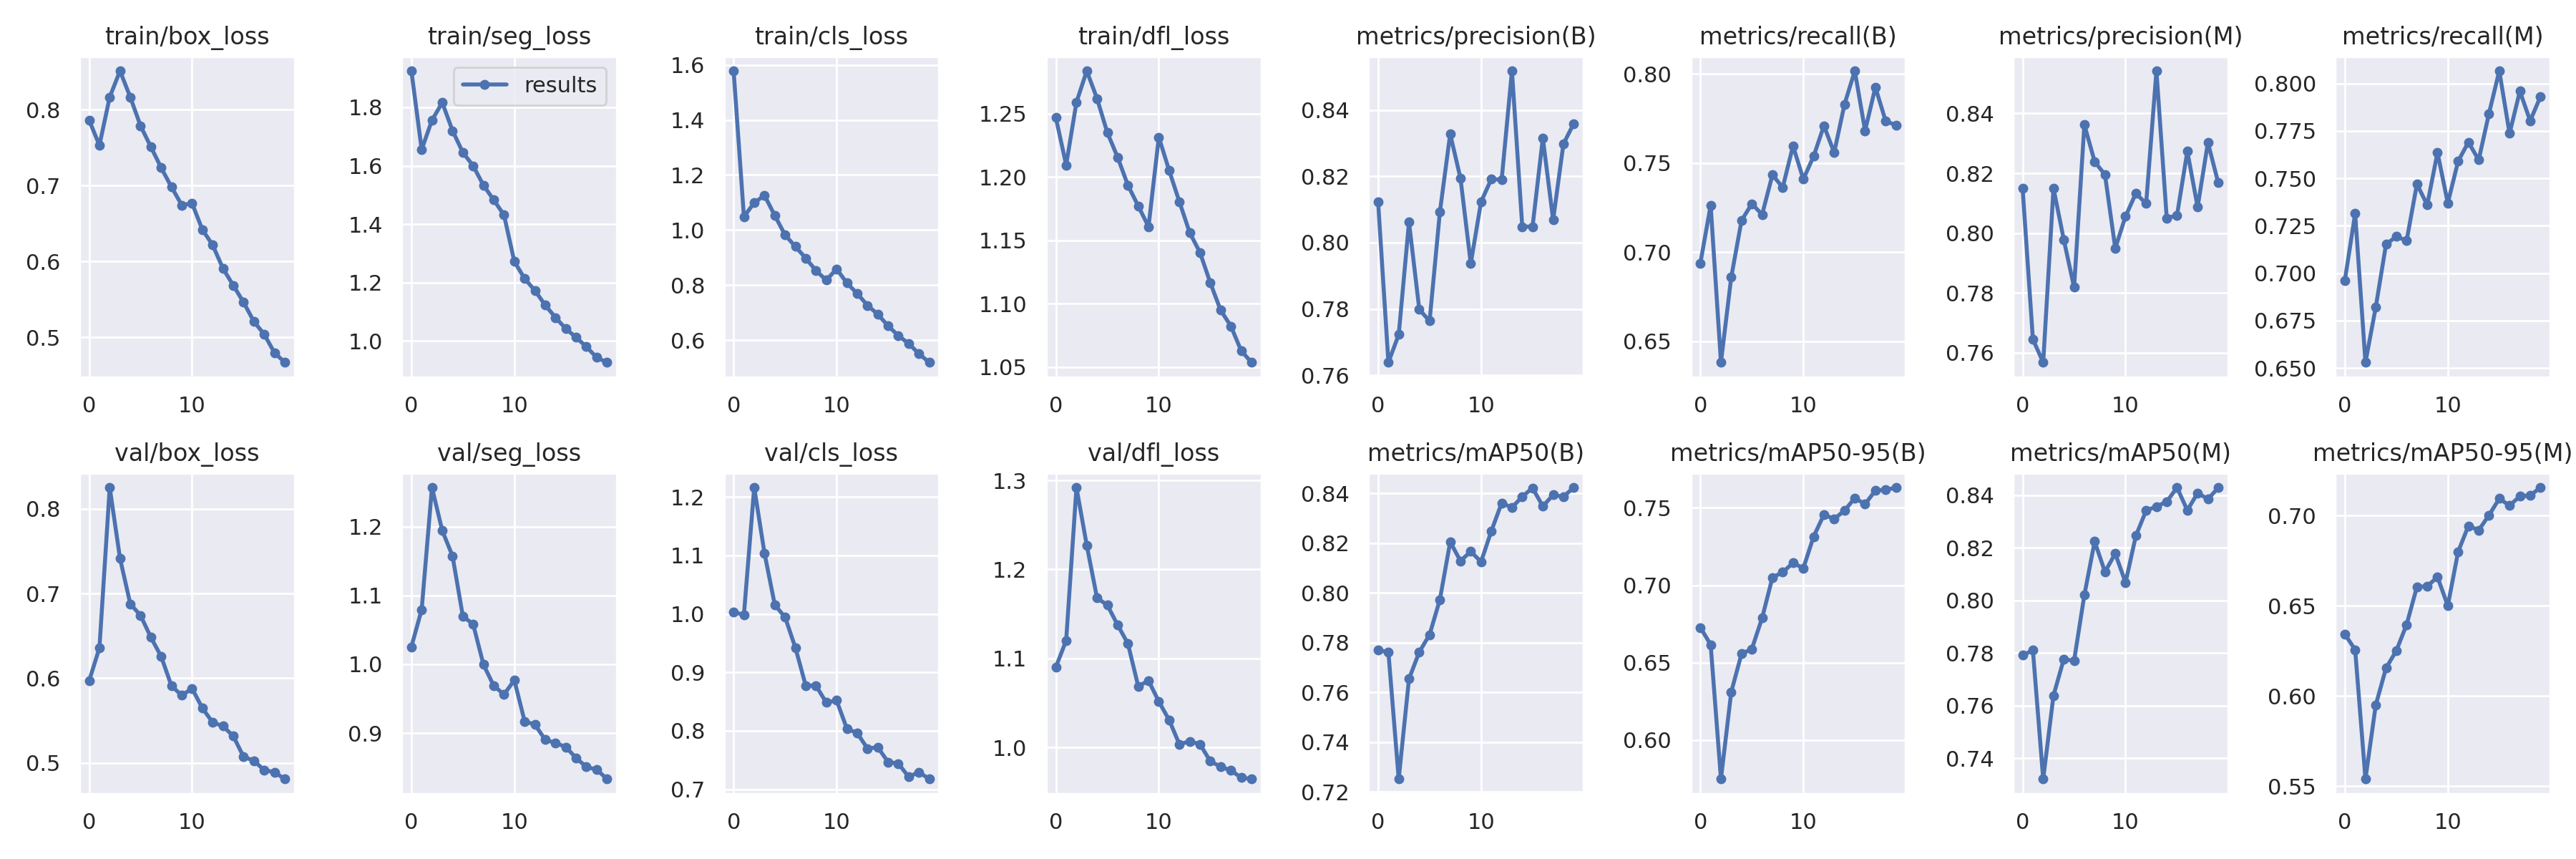

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000)

/content


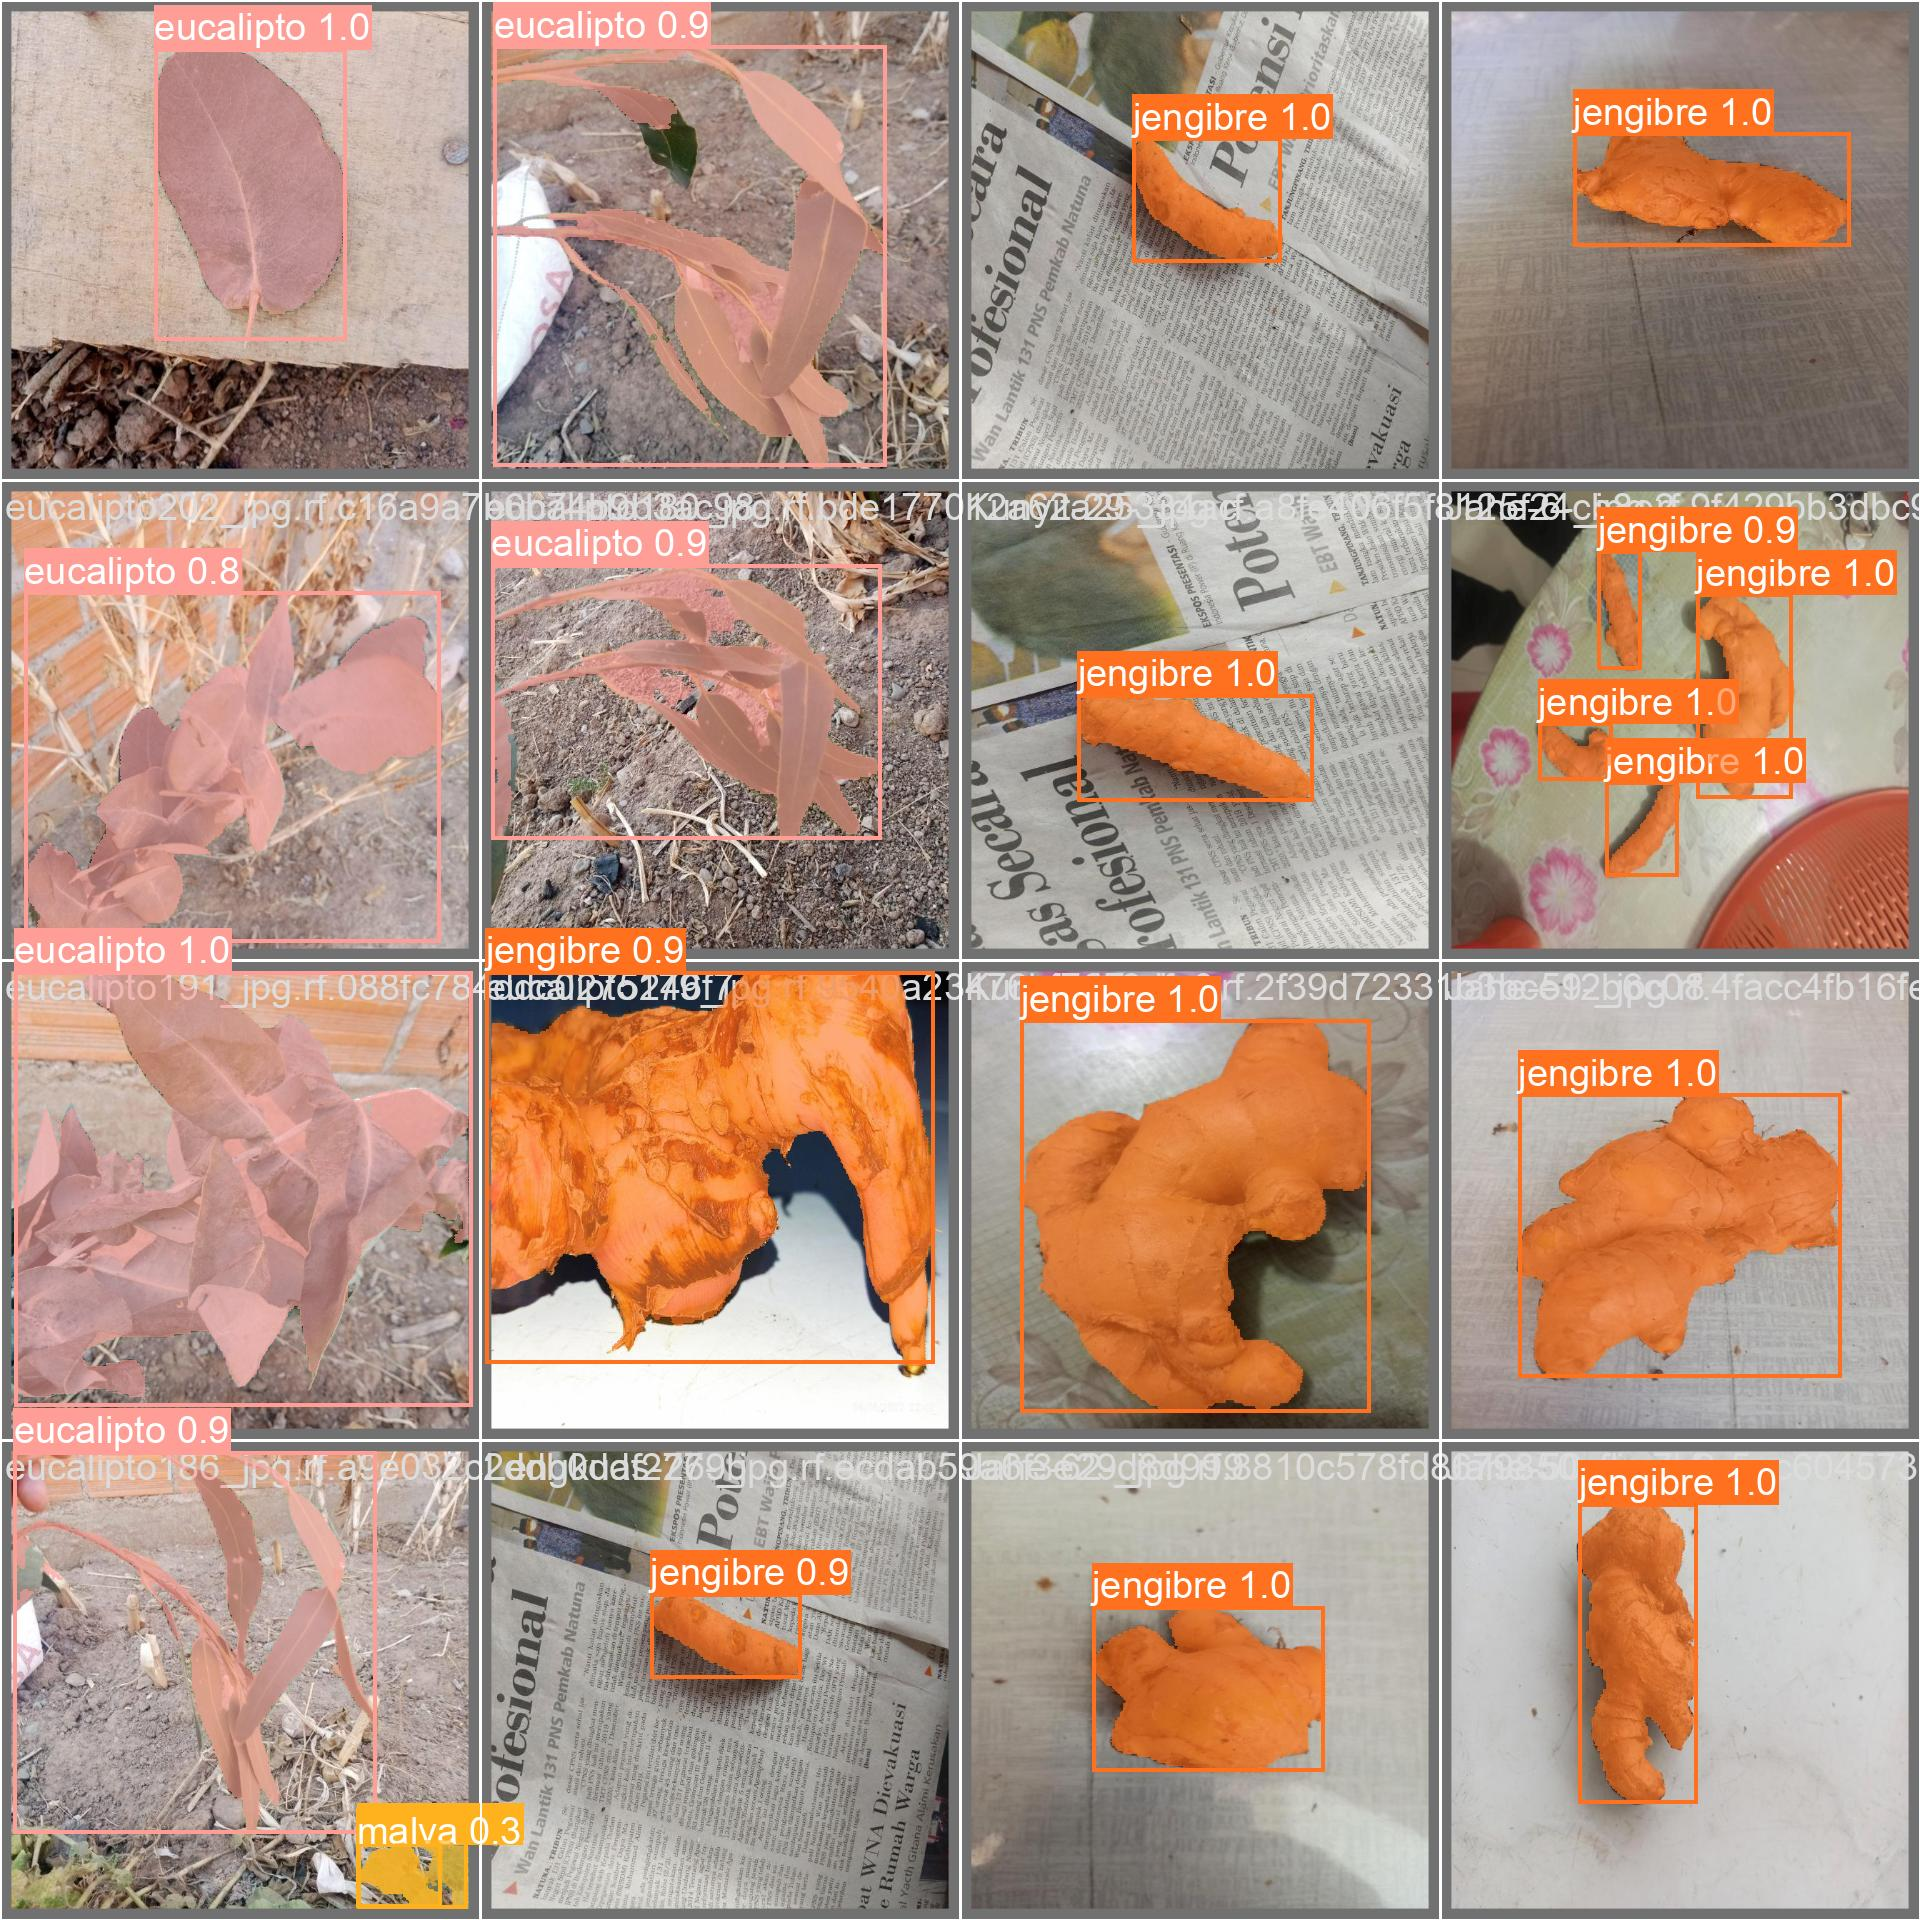

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch1_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train13/weights/best.pt data=/content/medicinal-plants-15/data.yaml

[Errno 2] No such file or directory: '{HOME}'
/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 243, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 62, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 92, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 389, in attempt_load_one_weight
    ckpt = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 336, in torch_safe_load
    return torch.load(file, map_location='cpu')  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/seria

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=/content/drive/MyDrive/USFX/TrainPlantsLONG/train13/weights/best.pt conf=0.25 source=/content/medicinal-plants-15/test/images save=true

[Errno 2] No such file or directory: '{HOME}'
/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 243, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 62, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 92, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 389, in attempt_load_one_weight
    ckpt = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 336, in torch_safe_load
    return torch.load(file, map_location='cpu')  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/seria

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

NameError: ignored

# Test a image

In [ ]:
%cp -r '/content/runs' '/content/drive/MyDrive/USFX/train6'

In [ ]:
%cd '/content/drive/MyDrive/USFX/train6'

/content/drive/MyDrive/USFX/train6


In [ ]:
!ls

6_train-yolov8-instance-segmentation-on-custom-dataset.ipynb  runs


In [ ]:
!pwd

/content/drive/MyDrive/USFX/train6


In [ ]:
model = YOLO('runs/segment/train/weights/best.pt')
image_path = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/IMG_20231004_102909_810.jpg'
results1 = model.predict(source=image_path, conf=0.25, save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/IMG_20231004_102909_810.jpg: 640x480 1 alparraco, 36.3ms
Speed: 0.7ms pre-process, 36.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict8


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/segment/predict8/*.jpg')[:3]:
      display(Image(filename=image_path, height=1000))
      print("\n")

In [ ]:
results1[0].boxes.xyxy

tensor([[ 651., 1315., 2577., 3540.]], device='cuda:0')

In [ ]:
 # Extract detections for person class
class_names = model.names

# Itera sobre los resultados y muestra los nombres de las clases
for result in results1:
    boxes = result.boxes.cpu().numpy()
    for class_id in boxes.cls:
        class_name = class_names[int(class_id)]
        print("Clase:", class_name)

Clase: alparraco


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/train2


In [ ]:
model = YOLO('runs/segment/train/weights/best.pt')
image_path = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/1000eu.jpg'
results2 = model.predict(source=image_path, conf=0.25, save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/1000eu.jpg: 448x640 1 eucalipto, 39.9ms
Speed: 0.6ms pre-process, 39.9ms inference, 9.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict9


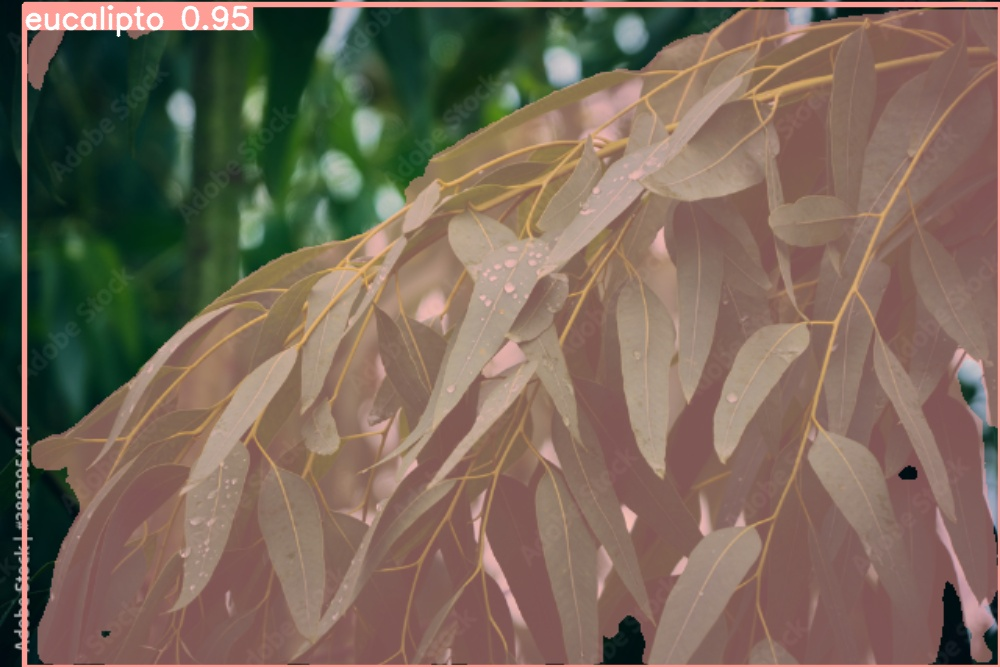

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/segment/predict9/*.jpg')[:3]:
      display(Image(filename=image_path, height=500))
      print("\n")

In [ ]:
# Obtén los nombres de las clases del modelo
class_names = model.names

# Itera sobre los resultados y muestra los nombres de las clases
for result in results2:
    boxes = result.boxes.cpu().numpy()
    for class_id in boxes.cls:
        class_name = class_names[int(class_id)]
        print("Clase:", class_name)

Clase: eucalipto


In [ ]:
model = YOLO('runs/segment/train/weights/best.pt')
image_path = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/IMG_20231006_103721_813.jpg'
results = model.predict(source=image_path, conf=0.25, save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/IMG_20231006_103721_813.jpg: 640x480 1 alparraco, 1 eucalipto, 36.2ms
Speed: 0.6ms pre-process, 36.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict7


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/segment/predict7/*.jpg')[:3]:
      display(Image(filename=image_path, height=1300))
      print("\n")

In [ ]:
 # Extract detections for person class
class_names = model.names

# Itera sobre los resultados y muestra los nombres de las clases
for result in results:
    boxes = result.boxes.cpu().numpy()
    for class_id in boxes.cls:
        class_name = class_names[int(class_id)]
        print("Clase:", class_name)

Clase: alparraco
Clase: eucalipto


In [ ]:
for result in results:
    boxes = result.boxes.cpu().numpy()
    class_id = boxes.cls
    print("ID: ", class_id)

ID:  [          0           1]


MALVA

In [ ]:
model = YOLO('runs/segment/train/weights/best.pt')
image_path = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/IMG_20231011_090312_004.jpg'
results = model.predict(source=image_path, conf=0.25, save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/IMG_20231011_090312_004.jpg: 640x480 2 malvas, 84.2ms
Speed: 0.7ms pre-process, 84.2ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=1000))
      print("\n")

In [ ]:
# Obtén los nombres de las clases del modelo
class_names = model.names

# Itera sobre los resultados y muestra los nombres de las clases
for result in results:
    boxes = result.boxes.cpu().numpy()
    for class_id in boxes.cls:
        class_name = class_names[int(class_id)]
        print("Clase:", class_name)

Clase: malva
Clase: malva


TRES CLASES, MALVA, ALPARRACO y EUCALIPTO

In [ ]:
model = YOLO('runs/segment/train/weights/best.pt')
image_path = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/IMG_20231011_091005_503.jpg'
results10 = model.predict(source=image_path, conf=0.25, save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs

image 1/1 /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/IMG_20231011_091005_503.jpg: 640x480 1 alparraco, 1 eucalipto, 1 malva, 35.9ms
Speed: 0.6ms pre-process, 35.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/segment/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, height=1500))
      print("\n")

In [ ]:
# Obtén los nombres de las clases del modelo
class_names = model.names

# Itera sobre los resultados y muestra los nombres de las clases
for result in results10:
    boxes = result.boxes.cpu().numpy()
    for class_id in boxes.cls:
        class_name = class_names[int(class_id)]
        print("Clase:", class_name)

Clase: alparraco
Clase: malva
Clase: eucalipto


In [ ]:
for result in results10:
    boxes = result.boxes.cps().numpy()
    class_id = boxes.cls
    print("ID: ", class_id)

ID:  [          0           2           1]


# Test a video

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/train3


In [ ]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/train3/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 81.6MB/s]


In [ ]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

In [ ]:
model = YOLO('runs/segment/train/weights/best.pt')
video_path = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231012_093651.mp4'
results11 = model.predict(source=video_path, conf=0.25, save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224121 parameters, 0 gradients, 110.0 GFLOPs

video 1/1 (1/436) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231012_093651.mp4: 640x384 3 malvas, 87.0ms
video 1/1 (2/436) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231012_093651.mp4: 640x384 4 malvas, 30.9ms
video 1/1 (3/436) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231012_093651.mp4: 640x384 2 malvas, 30.9ms
video 1/1 (4/436) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231012_093651.mp4: 640x384 1 alparraco, 4 malvas, 31.0ms
video 1/1 (5/436) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_images/VID_20231012_093651.mp4: 640x384 3 malvas, 31.1ms
video 1/1 (6/436) /content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/test_imag

In [ ]:
# Obtén los nombres de las clases del modelo
class_names = model.names

# Itera sobre los resultados y muestra los nombres de las clases
for result in results11:
    boxes = result.boxes.cpu().numpy()
    for class_id in boxes.cls:
        class_name = class_names[int(class_id)]
        print("Clase:", class_name)

Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: malva
Clase: alparraco
Clase: malva

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'runs/segment/predict4/VID_20231012_093651.mp4'

In [ ]:
# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

0

In [ ]:
!rm /content/result_compressed.mp4

In [ ]:
# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Export

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                             | `format` Argument | Model                     | Metadata | Arguments                                           |
|--------------------------------------------------------------------|-------------------|---------------------------|----------|-----------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                    | -                 | `yolov8n.pt`              | ✅        | -                                                   |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)            | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`                                 |
| [ONNX](https://onnx.ai/)                                           | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`     |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)             | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`                                     |
| [TensorRT](https://developer.nvidia.com/tensorrt)                  | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace` |
| [CoreML](https://github.com/apple/coremltools)                     | `coreml`          | `yolov8n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`                      |
| [TF SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`                                    |
| [TF GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`                                             |
| [TF Lite](https://www.tensorflow.org/lite)                         | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`                             |
| [TF Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`                                             |
| [TF.js](https://www.tensorflow.org/js)                             | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`                                             |
| [PaddlePaddle](https://github.com/PaddlePaddle)                    | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`                                             |
| [ncnn](https://github.com/Tencent/ncnn)                            | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`                                     |


In [ ]:
%pwd

'/content/drive/MyDrive/USFX/train5'

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
model = YOLO('runs/segment/train/weights/best.pt')
results = model.export(format='tflite', imgsz=512)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225279 parameters, 0 gradients, 110.0 GFLOPs

PyTorch: starting from runs/segment/train/weights/best.pt with input shape (1, 3, 512, 512) and output shape (1, 41, 5376) (52.3 MB)


NotImplementedError: ignored

In [ ]:
!cd '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/train3/runs/segment/train/weights'

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/train3


In [ ]:
%cd {HOME}

/content


In [ ]:
!pwd

/content


# ONNX to TF

In [ ]:
!pip install onnx

In [ ]:
!git clone https://github.com/onnx/onnx-tensorflow.git

fatal: destination path 'onnx-tensorflow' already exists and is not an empty directory.
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
%cd '/content/onnx-tensorflow'

/content/onnx-tensorflow


In [ ]:
!pwd

/content/onnx-tensorflow


In [ ]:
!pip install -e .

Obtaining file:///content/onnx-tensorflow
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 11.9 MB/s eta 0:00:00
  Running setup.py develop for onnx-tf


In [ ]:
!pip install onnx-tf

In [ ]:
!pwd

/content/onnx-tensorflow


In [ ]:
import onnx_tf
import onnx

model_onnx = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/train3/runs/segment/train/weights/best.onnx'
 # Load  ONNX model
onnx_model = onnx.load(model_onnx)

 # Convert ONNX model to TensorFlow format
tf_model = onnx_tf.backend.prepare(onnx_model)
 # Export  TensorFlow  model
tf_model.export_graph("best.tf")

INFO:absl:Function `__call__` contains input name(s) x, y with unsupported characters which will be renamed to transpose_295_x, add_97_y in the SavedModel.
INFO:absl:Found untraced functions such as gen_tensor_dict while saving (showing 1 of 1). These functions will not be directly callable after loading.
INFO:absl:Writing fingerprint to best.tf/fingerprint.pb


# TF to TFLite

In [ ]:
model_pb = '/content/onnx-tensorflow/best.tf'
converter = tf.lite.TFLiteConverter.from_saved_model(model_pb)

tflite_model = converter.convert()
open('best.tflite', 'wb').write(tflite_model)

ConverterError: ignored

In [ ]:
import tensorflow as tf
import onnx_tf
model_pb = '/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/train3/runs/segment/train/weights/saved_model.pb'


# Carga tu modelo de .onnx
onnx_model = onnx_tf.backend.prepare('/content/drive/MyDrive/Colab Notebooks/IA_Pacheco/SIS330/trains/train3/runs/segment/train/weights/best.onnx')

# Convierte el modelo a .tflite usando el modo experimental MLIR
converter = tf.lite.TFLiteConverter.from_keras_model(onnx_model)
converter.experimental_new_converter = True
tflite_model = converter.convert()

# Guarda el modelo en un archivo
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


AttributeError: ignored

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

# Deploy Your Model to the Edge

![Roboflow Inference banner](https://blog.roboflow.com/content/images/2023/08/banner.png)

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

In [ ]:
!python --version


Python 3.10.12
